<a href="https://colab.research.google.com/github/sandeeps02/Hotel-Booking-Project--Almabetter/blob/main/EDA_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - HOTEL BOOKING ANALYSIS



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary**

This is a project that aims to provide insights into consumer preferences, trends, and patterns in the hospitality industry. By analyzing the data on hotel bookings,we can gain valuable insights into what factors are most important to guests, what types of rooms are most popular, and how hotel bookings vary over time.

The data needs to be cleaned and preprocessed to remove any duplicates, missing values, or outliers. This also involve's transforming some variables and creating new variables to make the data more useful for analysis.

After the data is cleaned, the next step is to perform exploratory data analysis using tools such as box plots and scatterplots,etc. This helps us to understand the distribution of the data, identify any patterns or trends and outliers, and visualize any relationships between variables.

Finally, we can use data visualization tools such as graphs, charts, and tables to communicate our findings and insights to stakeholders, such as hotel managers, investors, or marketing teams. This can help them to make more informed decisions about pricing, marketing, and other business strategies.

# **GitHub Link -**

https://github.com/Jassibro/EDA-PROJECT.git

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

To gain insights and make data-driven decisions to optimize the hotel's operations and improve customer experience.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

### Dataset Loading

In [ ]:
# mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# assigning the path of the csv file in Drive
path='/content/drive/MyDrive/Hotel Bookings.csv'

In [ ]:
# Load Dataset
df=pd.read_csv(path,parse_dates=['reservation_status_date'])
# Making a copy of dataset in df1
df1=df.copy()

### Dataset First View

In [ ]:
# Dataset First Look
pd.set_option('display.max_columns',32)
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df1.shape

(119390, 32)

### Dataset Information

In [ ]:
# Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df1[df1.duplicated()].count()

hotel                             31994
is_canceled                       31994
lead_time                         31994
arrival_date_year                 31994
arrival_date_month                31994
arrival_date_week_number          31994
arrival_date_day_of_month         31994
stays_in_weekend_nights           31994
stays_in_week_nights              31994
adults                            31994
children                          31994
babies                            31994
meal                              31994
country                           31958
market_segment                    31994
distribution_channel              31994
is_repeated_guest                 31994
previous_cancellations            31994
previous_bookings_not_canceled    31994
reserved_room_type                31994
assigned_room_type                31994
booking_changes                   31994
deposit_type                      31994
agent                             27847
company                            1538


In [ ]:
# Removing duplicates
df1.drop_duplicates(inplace=True)
df1.shape

(87396, 32)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
na_values=df1.isna().sum()
na_values

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


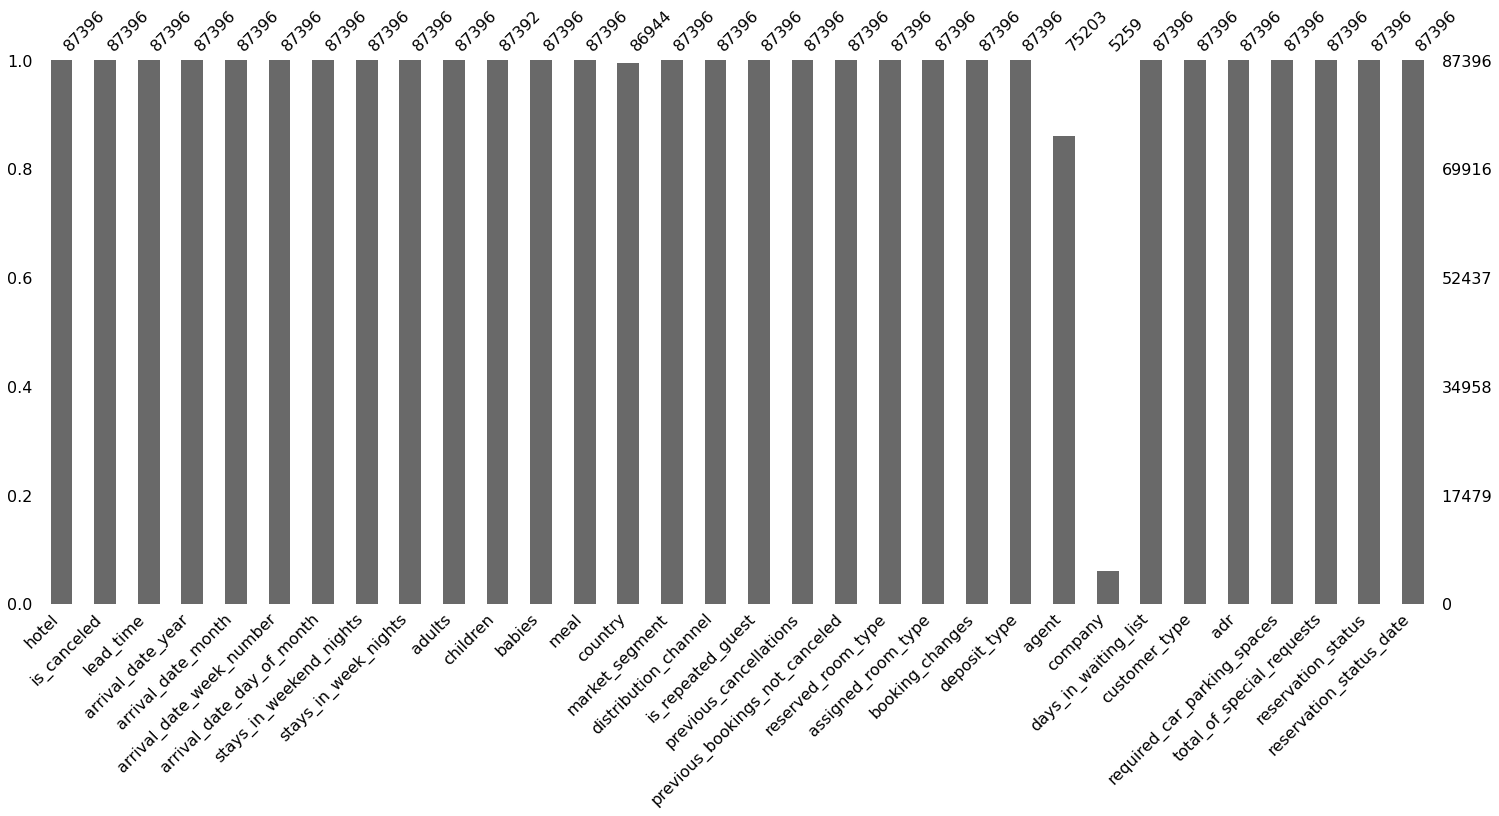

In [ ]:
# Visualizing the missing values
msno.bar(df1);

In [ ]:
# Filling null vlaues with 0.
df1.fillna(0,inplace=True)

### What did you know about your dataset?

The dataset consists of 119390 Rows and 32 Columns.In the Dataset most of the columns have 31994 duplicated values and the columns agent company and country have 27487,1538 and 31958 duplicated values respectively.The dataframe have datatypes as follow- datetime64[[ns]](1), float64(4), int64(16), object(11). In the entire dataset there are null/missing values only in 4 columns viz. country,children,agent and company.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Dataset Describe
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description 

####**hotel:** the name or type of hotel (e.g., resort hotel, city hotel)
####**is_canceled:** a binary variable indicating whether the booking was canceled (1) or not (0)
####**lead_time:** the number of days between the booking date and the arrival date
####**arrival_date_year:** the year of the arrival date
####**arrival_date_month:** the month of the arrival date
####**arrival_date_week_number:** the week number of the arrival date within the year
####**arrival_date_day_of_month:** the day of the month of the arrival date
####**stays_in_weekend_nights:** the number of weekend nights (i.e., Saturday, Sunday) the customer stayed
####**stays_in_week_nights:** the number of weekday nights (i.e., Monday to Friday) the customer stayed
####**adults:** the number of adults included in the booking
####**children:** the number of children included in the booking
####**babies:** the number of babies included in the booking
####**meal:** the type of meal included in the booking (e.g., breakfast, full board)
####**country:** the country of origin of the customer
####**market_segment:** the type of market segment the booking belongs to (e.g., corporate, group, online TA)
####**distribution_channel:** the booking distribution channel (e.g., travel agent, direct)
####**is_repeated_guest:** a binary variable indicating whether the customer is a repeat guest (1) or not (0)
####**previous_cancellations:** the number of previous bookings that were canceled by the customer
####**previous_bookings_not_canceled:** the number of previous bookings that were not canceled by the customer
####**reserved_room_type:** the type of room reserved by the customer
####**assigned_room_type:** the type of room assigned to the customer at check-in
####**booking_changes:** the number of changes made to the booking before check-in
####**deposit_type:** the type of deposit made for the booking (e.g., no deposit, non-refundable)
####**agent:** the ID of the travel agent that made the booking (if applicable)
####**company:** the ID of the company that made the booking (if applicable)
####**days_in_waiting_list:** the number of days the booking was on the waiting list before it was confirmed
####**customer_type:** the type of customer (e.g., transient, contract, group)
####**adr:** the average daily rate (i.e., the total booking revenue divided by the number of nights stayed)
####**required_car_parking_spaces:** the number of car parking spaces required by the customer
####**total_of_special_requests:** the total number of special requests made by the customer (e.g., extra bed, late check-out)
####**reservation_status:** the current reservation status (e.g., canceled, checked-out)
####**reservation_status_date:** the date when the reservation status was last updated.

### Check Unique Values for each variable.

In [ ]:
# count of unique values in every column
df1.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              334
company                            353
days_in_waiting_list     

In [ ]:
# unique values in hotel column
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
# unique values in arrival_date_year column
df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
# unique values in deposit_type column
df1['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [ ]:
# unique values in reserved_room _type column
df1['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [ ]:
# unique values in assigned_room_type column
df1['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [ ]:
# # unique values in market_segment column
df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
# unique values in customer_type column
df1['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
# # unique values in meal column
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Creating columns for total no. of stays and total guests.
df1["total_stay"]=df1['stays_in_week_nights']+df1['stays_in_weekend_nights']
df1['total_guests']=df1['adults']+df1['children']+df1['babies']

In [ ]:
# Dataset Describe
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay,total_guests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567,3.630658,2.025253
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946,2.763449,0.794319
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000,3.000000,2.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000,5.000000,2.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,69.000000,55.000000


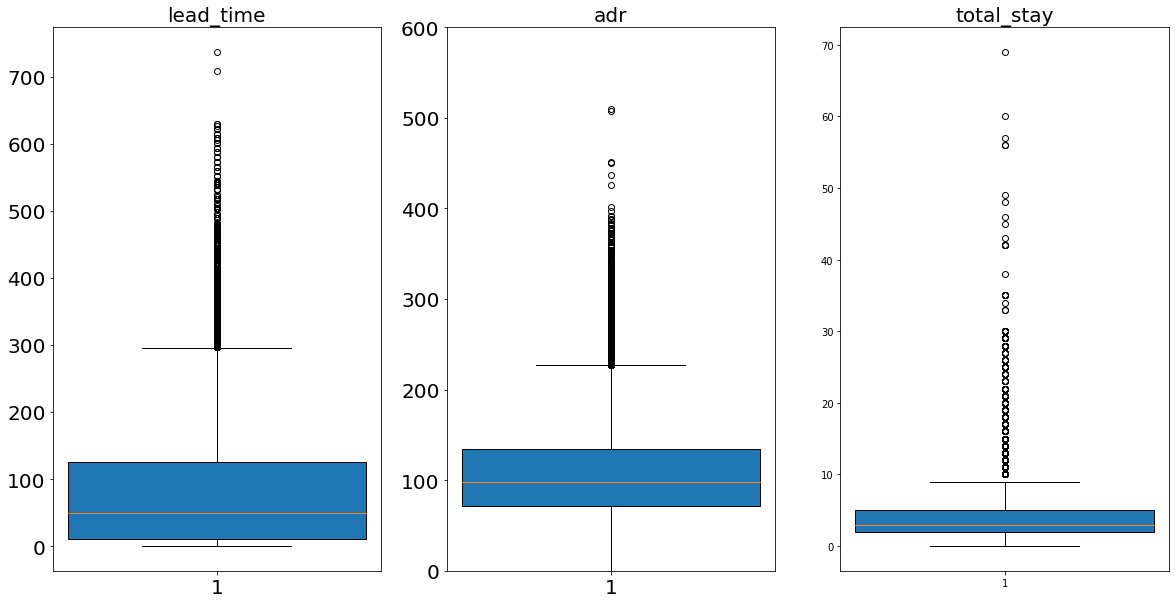

In [ ]:
# Detecting Outliers and vague values
fig,axs= plt.subplots(1, 3, figsize=(20, 10))
axs[0].boxplot(df1['lead_time'], widths=2, patch_artist=True);
axs[0].tick_params(axis='both', labelsize=20)
axs[0].set_title("lead_time",fontsize=20)
axs[1].boxplot(df1["adr"],widths=2,patch_artist=True);
axs[1].set_ylim([0, 600])
axs[1].tick_params(axis='both', labelsize=20)
axs[1].set_title("adr",fontsize=20)
axs[2].boxplot(df1['total_stay'],widths=2,patch_artist=True)
axs[2].set_title("total_stay",fontsize=20);

In [ ]:
# Removing outliers from lead_time column
indices_to_drop=df1[df1['lead_time']>365].index
df1.drop(indices_to_drop,inplace=True)


In [ ]:
# Removing outliers from adr column
indices_to_be_dropped=df1[(df1['adr']<=0) | (df1['adr']>400)].index
df1.drop(indices_to_be_dropped,inplace=True)

In [ ]:
# Removing vague value rows.
vague_value_indices=df1[(df1['adults'] + df1['children'] + df1['babies'] == 0 )].index
df1.drop(vague_value_indices,inplace=True)

### What all manipulations have you done and insights you found?

1.Made a copy of the original Dataframe in df1.

2.From the Dataframe,Calculated all the duplicated values and removed them from df1.

3.Found all the null/missing values from the Dataframe and replaced it wtih 0.

4.Found the outliers from the boxplot and removed them from the Dataframe.

6.Created columns for total stays and total guests for every booking.

5.From the observation from unique values in assigned_room_type and reserved_room_type, i concluded that room type I and K are never the reserved_room_type.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Chart - 1
#Q1. What are the top 10 countries of origin of guests?From which country the no. of Guests are maximum?

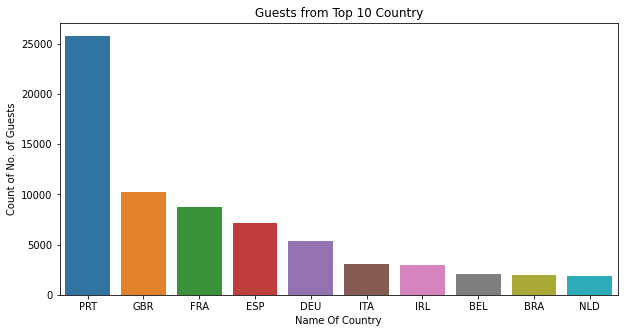

In [ ]:
# chart 1-visualization code
country_counts=df1['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.index,y=country_counts.values)
plt.title('Guests from Top 10 Country')
plt.xlabel('Name Of Country')
plt.ylabel('Count of No. of Guests')
plt.show()

##### 1. Why did you pick the specific chart?

It is a useful way to visualize the distribution of a categorical variable and is also useful in comparing the Frequency of different country's.

##### 2. What is/are the insight(s) found from the chart?

From the Chart it is clearly seen that the maximum no. Guests comes from Portugal(PRT), then Britain(GBR) and then from France(FRA).The difference in the no. of bookings between PRT and other country's is very large. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

With the gained insights we can ask the hotels to identify why there are less no. of booking from other country's and ask them to change their market strategy or offer discounts for people coming from those country's to generate more revenue.
For negative growth, if the significantly higher no. of booking is from a particular country then hotel's need to identify the reason for it as it can be due to the economic meltdown in that country or refugee movements or for some other reasons which may also result in huge cancellation.

# Chart - 2
#Q2.Which Hotel is more preferred by the Guests?

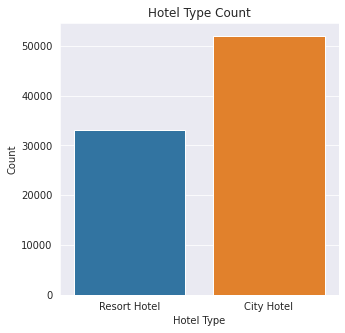

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(5,5))
sns.countplot(x="hotel", data=df1)
plt.title("Hotel Type Count")
plt.xlabel("Hotel Type")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

The countplot easily plots the Frequency count of a certain variable and gives it a nice visulization to easily predict out the results with certain accuracy.

##### 2. What is/are the insight(s) found from the chart?

From the chart it is clearly shown that the City Hotel is more preferred by the Guest's.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As City hotel is more preferred by the Guests than Resort Hotel. City hotel can increase it's price to generate more revenue and resort hotel needs to change some strategies to find out why there is so much difference in the no. of booking and take actions on it such as reducing the adr or providing more services.

# Chart - 3
#Q3.What is the distribution of meal types? Which meal type is most common?

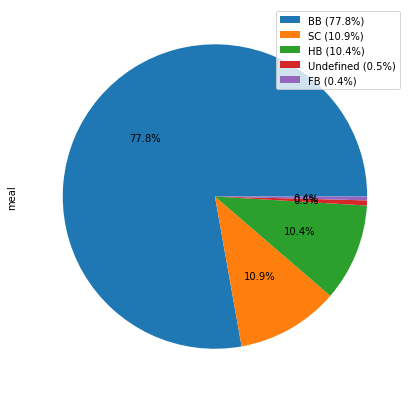

In [ ]:
# Chart - 3 visualization code
meal_count=df1['meal'].value_counts()
meal_count.plot(kind='pie',autopct='%.1f%%',figsize=(7,7),labels=None)
labels = meal_count.index
percentages = meal_count.values / meal_count.sum() * 100
legend_labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(labels, percentages)]
plt.legend(legend_labels)
plt.show()

##### 1. Why did you pick the specific chart?

It clearly gives the better representation of showing a part as a whole.

##### 2. What is/are the insight(s) found from the chart?

It is clearly shown that the BB type meal is preferred mostly by the Guests and after that SC followed by HB. FB type is least preferred by the guests.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By understanding which meal plans are preferred by guests, hotel and resort management can tailor their offerings to meet the demands of their target market. For example, if guest's prefer BB plans, hotels can focus on providing high-quality breakfast options and promote it as a key feature of their property. This could attract more guest's and lead to positive growth for the business.

On the other hand, if the analysis shows that a particular meal plan is not preferred by guest's, it could be an opportunity for hotels and resorts to adjust their offerings and avoid potential negative growth. For example, if the FB meal plan is not popular among guests, hotels could reduce the offerings for this meal plan or even discontinue it altogether. This could help the hotel save costs and focus on promoting more popular meal plans that could help drive revenue.







# Chart - 4
#Q3.What is the distribution of reservations by month? Is there any seasonal patterns?

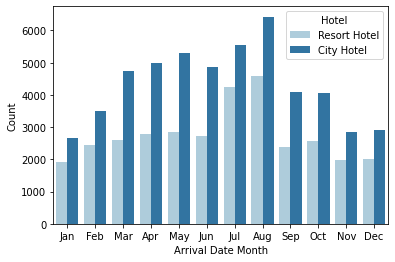

In [ ]:
# Chart - 4 visualization code
df1['arrival_date_month']=pd.to_datetime(df1['arrival_date_month'],format='%B').dt.month
sns.countplot(data=df1,x='arrival_date_month',hue='hotel',palette='Paired')
plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Hotel')
plt.ylabel('Count')
plt.xlabel('Arrival Date Month')
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is a useful visualization to display the frequency of categorical data.By using a countplot with hue set to 'hotel', it is easy to compare the counts of bookings for each hotel type across all the months, which could help identify any seasonal trends or differences in booking patterns.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can see that the number of reservations is generally highest in the summer months (July and August) and lowest in the winter months (December and January).The peak months are likely due to the warm weather and summer vacations, while the lower months may be due to colder temperatures and holiday gatherings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information could be used by hotels to adjust their pricing strategies or marketing campaigns to take advantage of the peak months and boost sales during the lower months. For example, hotels could offer promotions or discounts during the winter months to attract more customers and increase bookings.

As for negative growth, the insight that the number of reservations is generally lowest in the winter months could potentially lead to negative growth if hotels do not take appropriate actions to address this seasonality. If hotels do not adjust their pricing or marketing strategies during the lower months, they may experience decreased revenue and profitability, which could lead to negative growth over time. 

# Chart - 5
#Q4.What is the distribution of market segments? Which segment is most common?

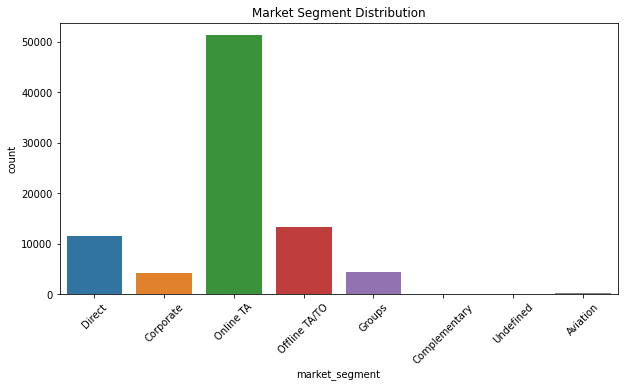

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='market_segment',data=df1);
plt.xticks(rotation=45)
plt.title('Market Segment Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

 It shows the count of each category in the 'market_segment' column.
 By using this visualization, we can identify which market segments are the 
 most popular among the hotel's guests.

##### 2. What is/are the insight(s) found from the chart?

The graph shows that the 'Online Travel Agents' (OTA) segment is the most popular. And also the bookings of corporate,Groups and Aviation segment is very less.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight gained from this visualization can help hotels to focus their marketing efforts towards the most popular segments and tailor their services and amenities to meet the needs of their target market.

For example, if the analysis shows that the 'Online Travel Agents' (OTA) segment is the most popular, hotels can focus on developing partnerships with OTA providers, offering special deals to OTA customers, and promoting their hotel on OTA platforms. This could help the hotel to attract more guests and potentially increase revenue.

The insight that bookings from corporate, groups, and aviation segments are very low may require further analysis to understand why this is the case and if any changes can be made to attract more bookings from these segments. It could potentially lead to negative growth if these segments are not targeted effectively or if there are underlying issues with the hotel's offerings or pricing that are causing low bookings from these segments.

# Chart - 6
#Q6.What is the distribution of reserved room types? Which room type is most common?

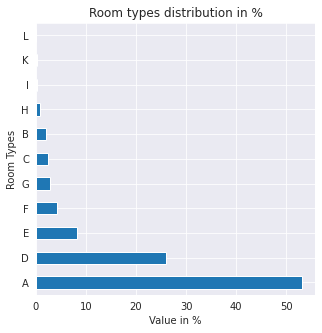

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(5,5))
room=df1['assigned_room_type'].value_counts(normalize=True)*100
room.plot(kind='barh')
plt.title("Room types distribution in %")
plt.xlabel("Value in %")
plt.ylabel("Room Types")
plt.show()

##### 1. Why did you pick the specific chart?

This is useful for quickly visualizing the distribution of different room types in a dataset and comparing their relative frequencies.

##### 2. What is/are the insight(s) found from the chart?

From the chart we can see Room Type A has the highest no of booking percentage after that Room Type D followed by E and others. Thus the most preferred Room Type is A maybe because it might be spacious than others or have a good view from there or maybe because of the location or amenities or might be because of the low price.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact by providing valuable information to the hotel management team. By knowing which room types are most popular among guests, they can allocate resources towards optimizing the design, amenities, and services offered in those rooms to enhance the guest experience and drive more bookings. For example, if Room Type A is the most popular room type, the hotel management team may decide to invest in renovating and upgrading those rooms to maintain high occupancy rates and attract more guests.

For insights that lead to negative growth,if the data shows that a particular room type is consistently receiving poor reviews or has a high rate of cancellations, this could negatively impact the hotel's reputation and revenue. In such cases, the hotel management team may need to take corrective action, such as addressing the underlying issues with the room type or adjusting its pricing strategy to encourage more bookings.Also,if the data shows that a room type is overbooked and consistently unable to accommodate guests, this could lead to negative reviews and decreased customer satisfaction, potentially impacting future bookings.

# Chart - 7
#Which Hotel have more number of repeated customers?

<Figure size 1440x1440 with 0 Axes>

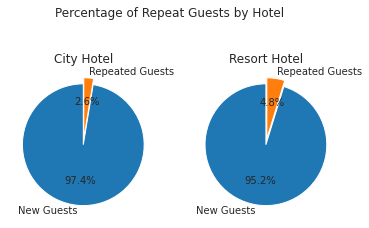

In [ ]:
#Chart - 7 visualization code
repeated_customers = df1.groupby(['hotel'])['is_repeated_guest'].value_counts().unstack()

city_hotel_pct = round(repeated_customers.loc['City Hotel', 1] / repeated_customers.loc['City Hotel'].sum() * 100, 2)
resort_hotel_pct = round(repeated_customers.loc['Resort Hotel', 1] / repeated_customers.loc['Resort Hotel'].sum() * 100, 2)

plt.figure(figsize=(20,20))
fig, (ax1, ax2) = plt.subplots(1, 2)
# for city hotel
labels = ['New Guests', 'Repeated Guests']
sizes = [100 - city_hotel_pct, city_hotel_pct]
explode = (0, 0.1)  
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('City Hotel')
# for resort hotel
labels = ['New Guests', 'Repeated Guests']
sizes = [100 - resort_hotel_pct, resort_hotel_pct]
explode = (0, 0.1) 
ax2.pie(sizes, explode=explode, labels=labels,  autopct='%1.1f%%', startangle=90)
ax2.set_title('Resort Hotel')

fig.suptitle('Percentage of Repeat Guests by Hotel')
plt.show()


##### 1. Why did you pick the specific chart?

I picked this specific chart because it effectively shows the percentage of repeat Guest's for each hotel type using pie charts. Pie charts are a good choice for this type of data because they allow the viewer to easily compare the proportions of two categories.

##### 2. What is/are the insight(s) found from the chart?

From the chart we can see that City Hotel has 2.6% of Repeated Guest's while Resort Hotel has 4.8% of Repeated Guest's. Comparatively it is clear that the the Percentage of Repeat Guest's is more in Resort Hotel. It might be because of the better service,location of the Hotel,amenities providid or overall Guests Experience. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By analyzing the percentage of repeat guests in each hotel, the business can identify which hotel is performing better and understand the factors contributing to that success. This knowledge can help the business develope strategies to increase the number of repeat guests in the City Hotel. Implementing changes to improve customer experience, service quality, and amenities could lead to an increase in customer satisfaction and a higher rate of repeat guests, ultimately increasing revenue for the business.

There are no insights from the chart that lead to negative growth. The analysis is purely focused on understanding the percentage of repeat guests in each hotel, which can only help the business understand its customer base.

# Chart - 8
#Q8.How does the average ADR vary by customer type?

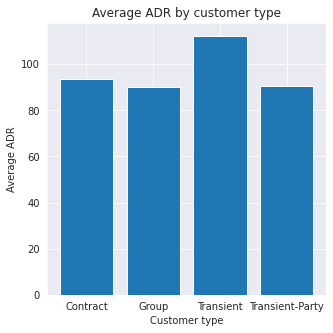

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(5,5))
avg_adr = df1.groupby('customer_type')['adr'].mean().reset_index()
plt.bar(avg_adr['customer_type'], avg_adr['adr'])
plt.xlabel('Customer type')
plt.ylabel('Average ADR')
plt.title('Average ADR by customer type')
plt.show()


##### 1. Why did you pick the specific chart?

I picked this specific chart because it provides valuable insights into the average daily rate (ADR) of customers based on their type.This chart provides a clear and concise visual representation of this data and can be easily understood.

##### 2. What is/are the insight(s) found from the chart?

The highest average ADR is for the 'Transient' customer type, followed by 'Contract' and 'Transient-party' customer types.The 'Group' customer type has the lowest average ADR among all customer types.The hotel management can use this information to adjust the pricing strategies for different customer types to maximize revenue and occupancy.
For example, they could offer discounts or promotions to attract more bookings from the 'Group' customer type, which has the lowest average ADR.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by informing pricing strategies that maximize revenue and occupancy for different customer types. By adjusting prices for different customer types, the hotel can potentially increase bookings and revenue.

There are no insights in this particular chart that would lead to negative growth. However, it's important to note that pricing adjustments should be made carefully and strategically, taking into account market conditions and competition to avoid pricing customers out of the market or losing business to competitors.

# Chart - 9
#Is there a relationship between the lead time and the likelihood of a booking being cancelled?

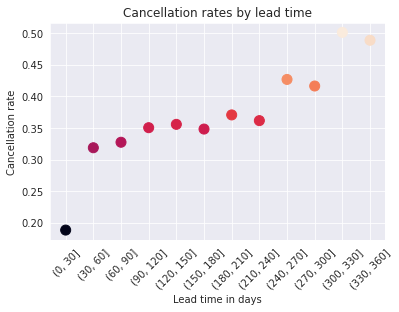

In [ ]:
# Chart - 9 visualization code
lead_time_intervals = pd.cut(df1['lead_time'], bins=range(0,365,30))
cancel_rates_by_lead_time = df1.groupby(lead_time_intervals)['is_canceled'].mean()
labels = [str(interval) for interval in cancel_rates_by_lead_time.index]
plt.scatter(labels, cancel_rates_by_lead_time, c=cancel_rates_by_lead_time, s=100)
plt.xticks(rotation=45)
plt.xlabel('Lead time in days')
plt.ylabel('Cancellation rate')
plt.title('Cancellation rates by lead time')
plt.show()


##### 1. Why did you pick the specific chart?

The chart visualizes the relationship between lead time in days and cancellation rates, which is an important metric for hotels to track.The scatter plot is an effective way to show this relationship and any patterns or trends that may exist.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the cancellation rate increases as the lead time increases.Bookings made further in advance are more likely to be canceled compared to bookings made closer to the arrival date.The highest cancellation rate is observed for bookings made more than 300 days in advance.Bookings made within 30 days of the arrival date have the lowest cancellation rate.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The hotel management can use this information to adjust their booking and cancellation policies to maximize revenue and occupancy. For example, they could offer flexible cancellation policies or promotions for bookings made closer to the arrival date to reduce the cancellation rate for bookings made further in advance.

On the other hand, if the hotel management does not take action based on these insights,it could lead to negative growth. If the cancellation rate for bookings made further in advance continues to increase, it could result in lower revenue and occupancy rates, as those rooms may not be able to be resold. Additionally, customers may become less likely to book with the hotel if they perceive that the cancellation rate is too high for bookings made further in advance.

# Chart - 10
#Q10.How does the average daily rate (ADR) vary by hotel type, customer type, and seasonality?


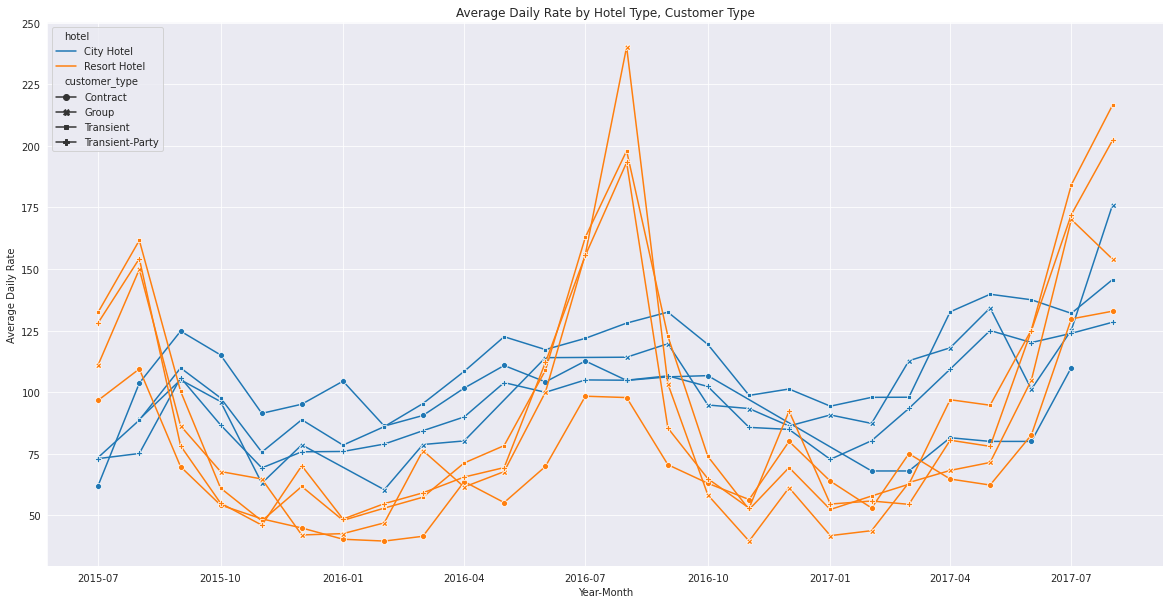

In [ ]:
#chart-10 visualization code
df1['year_month'] = pd.to_datetime(df1['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'], format='%Y-%B')
df_agg = df1.groupby(['hotel', 'customer_type', 'year_month'])['adr'].mean().reset_index()
sns.set_style('darkgrid')
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_agg, x='year_month', y='adr', hue='hotel', style='customer_type', markers=True, dashes=False)
plt.title('Average Daily Rate by Hotel Type, Customer Type')
plt.xlabel('Year-Month')
plt.ylabel('Average Daily Rate')
plt.show()


##### 1. Why did you pick the specific chart?

I picked this chart because it visualizes the trend of the average daily rate (ADR) over time by hotel type and customer type using a line plot. It uses color and style to differentiate between hotel types and customer types, making it easy to compare trends between different categories.

##### 2. What is/are the insight(s) found from the chart?

From the Graph we can clearly see that the ADR of City Hotel is more than ADR of Resort Hotel for all Customer Types for all the Months except for JULY and AUGUST in which the ADR of Resort Hotel is significantly high. Thus, we can say that in the summer month at the time of maybe festival or seasonality Resort Hotel increases its ADR.
We can also see that the ADR of Group and Contract type Customers is very less in both the hotels.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The hotel management can use these insights to adjust their pricing and marketing strategies to increase revenue and occupancy rates.

The insight that the ADR of Group and Contract type customers is very less in both hotels could potentially lead to negative growth if not addressed appropriately. The hotel management could consider implementing special discounts or promotions to attract more bookings from these customer types and increase their ADR. Failure to address this issue could result in lower revenue and occupancy rates.

# Chart - 11
#Q11.What is the average total bill of customers by year-month and hotel? How does this average total bill vary across different hotels and time periods?


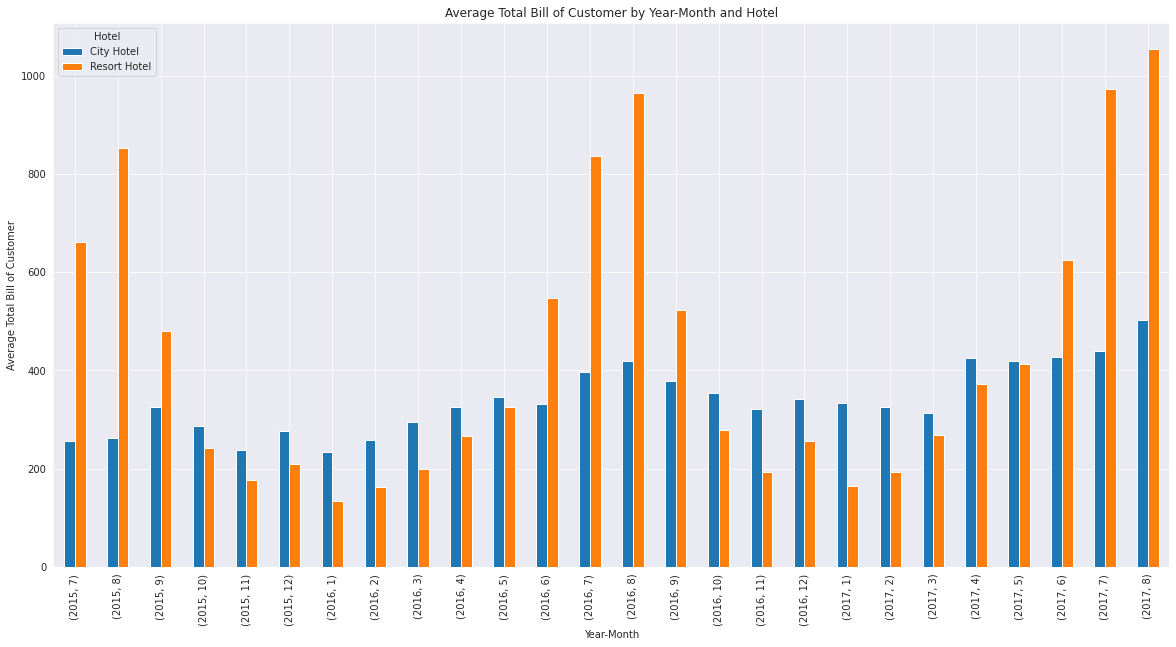

In [ ]:
df1['total_bill_of_customer']=df1['adr']*df1['total_stay']
grouped_data=df1.groupby(['arrival_date_year','arrival_date_month','hotel'])['total_bill_of_customer'].mean().unstack()
fig, ax = plt.subplots(figsize=(20, 10))
grouped_data.plot(kind='bar', ax=ax, position=0.5)
ax.set_xlabel('Year-Month')
ax.set_ylabel('Average Total Bill of Customer')
ax.set_title('Average Total Bill of Customer by Year-Month and Hotel')
ax.legend(title='Hotel')
plt.show()


##### 1. Why did you pick the specific chart?

To visualize the average total bill of customers for different hotels across different months and years. This chart provides insights into the revenue generated by the hotels and can help identify seasonal trends in customer spending.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

# Chart - 12
#How does the length of a customer's stay  vary by market segment and hotel type?

<AxesSubplot:xlabel='hotel', ylabel='total_stay'>

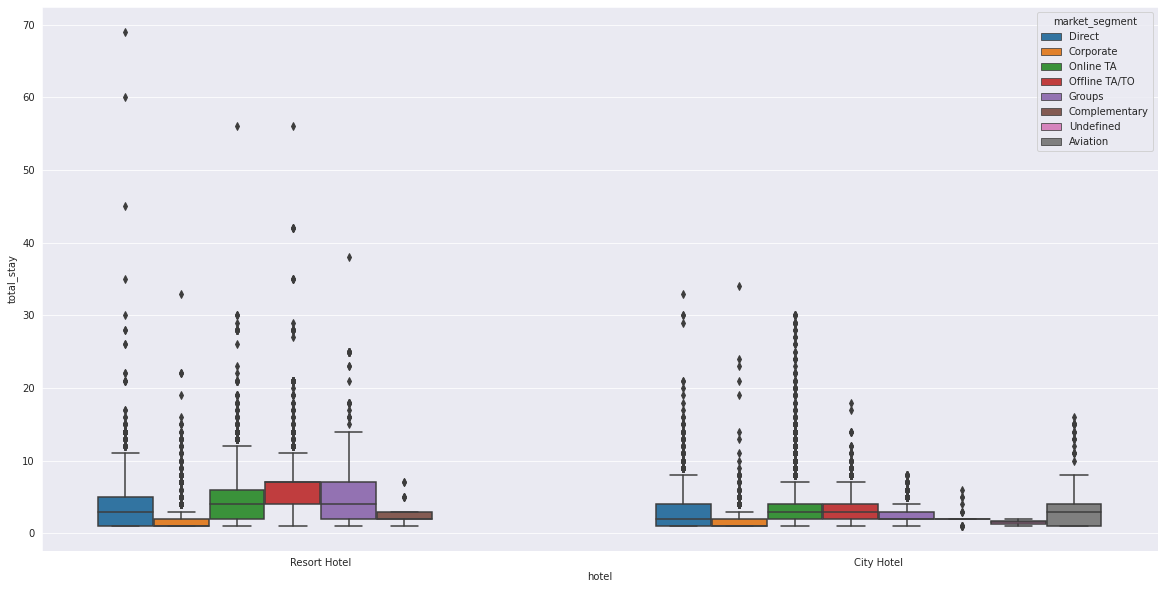

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='hotel', y='total_stay', hue='market_segment', data=df1)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

# Chart - 13
#Q13.What is the distribution of hotel bookings by day of the month for arrivals?How does this distribution vary between the Hotels?

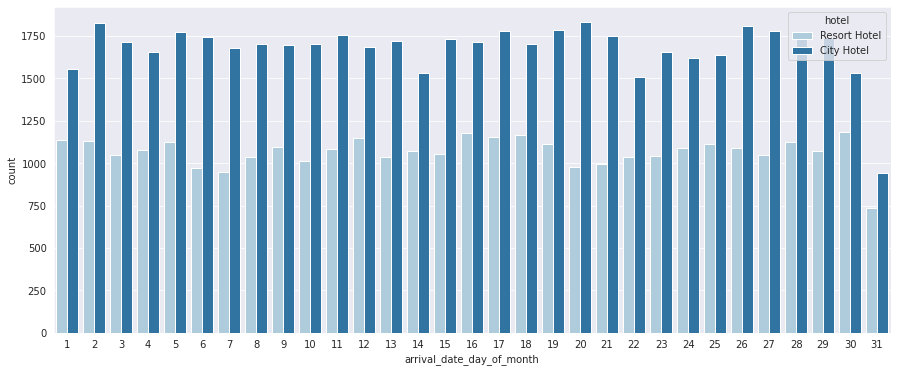

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(15,6))
sns.countplot(data=df1, x = 'arrival_date_day_of_month', hue='hotel', palette='Paired')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

# Chart - 14 - Correlation Heatmap

<AxesSubplot:>

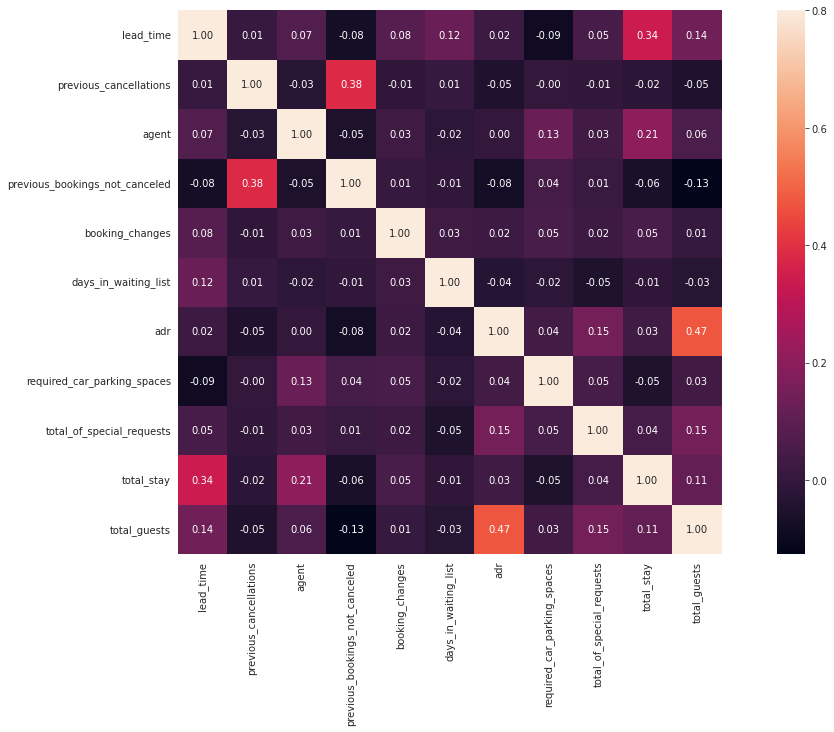

In [ ]:
# # Correlation Heatmap visualization code
num_df1=df1[['lead_time','previous_cancellations','agent','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_guests']]
#Correlation matrix
corrmat = num_df1.corr()
#Setting chart size 
f, ax = plt.subplots(figsize=(20, 10))
# code for heatmap chart
sns.heatmap(corrmat,annot=True,fmt='.2f',annot_kws={'size':10},vmax=.8,square=True)
# df1.info()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

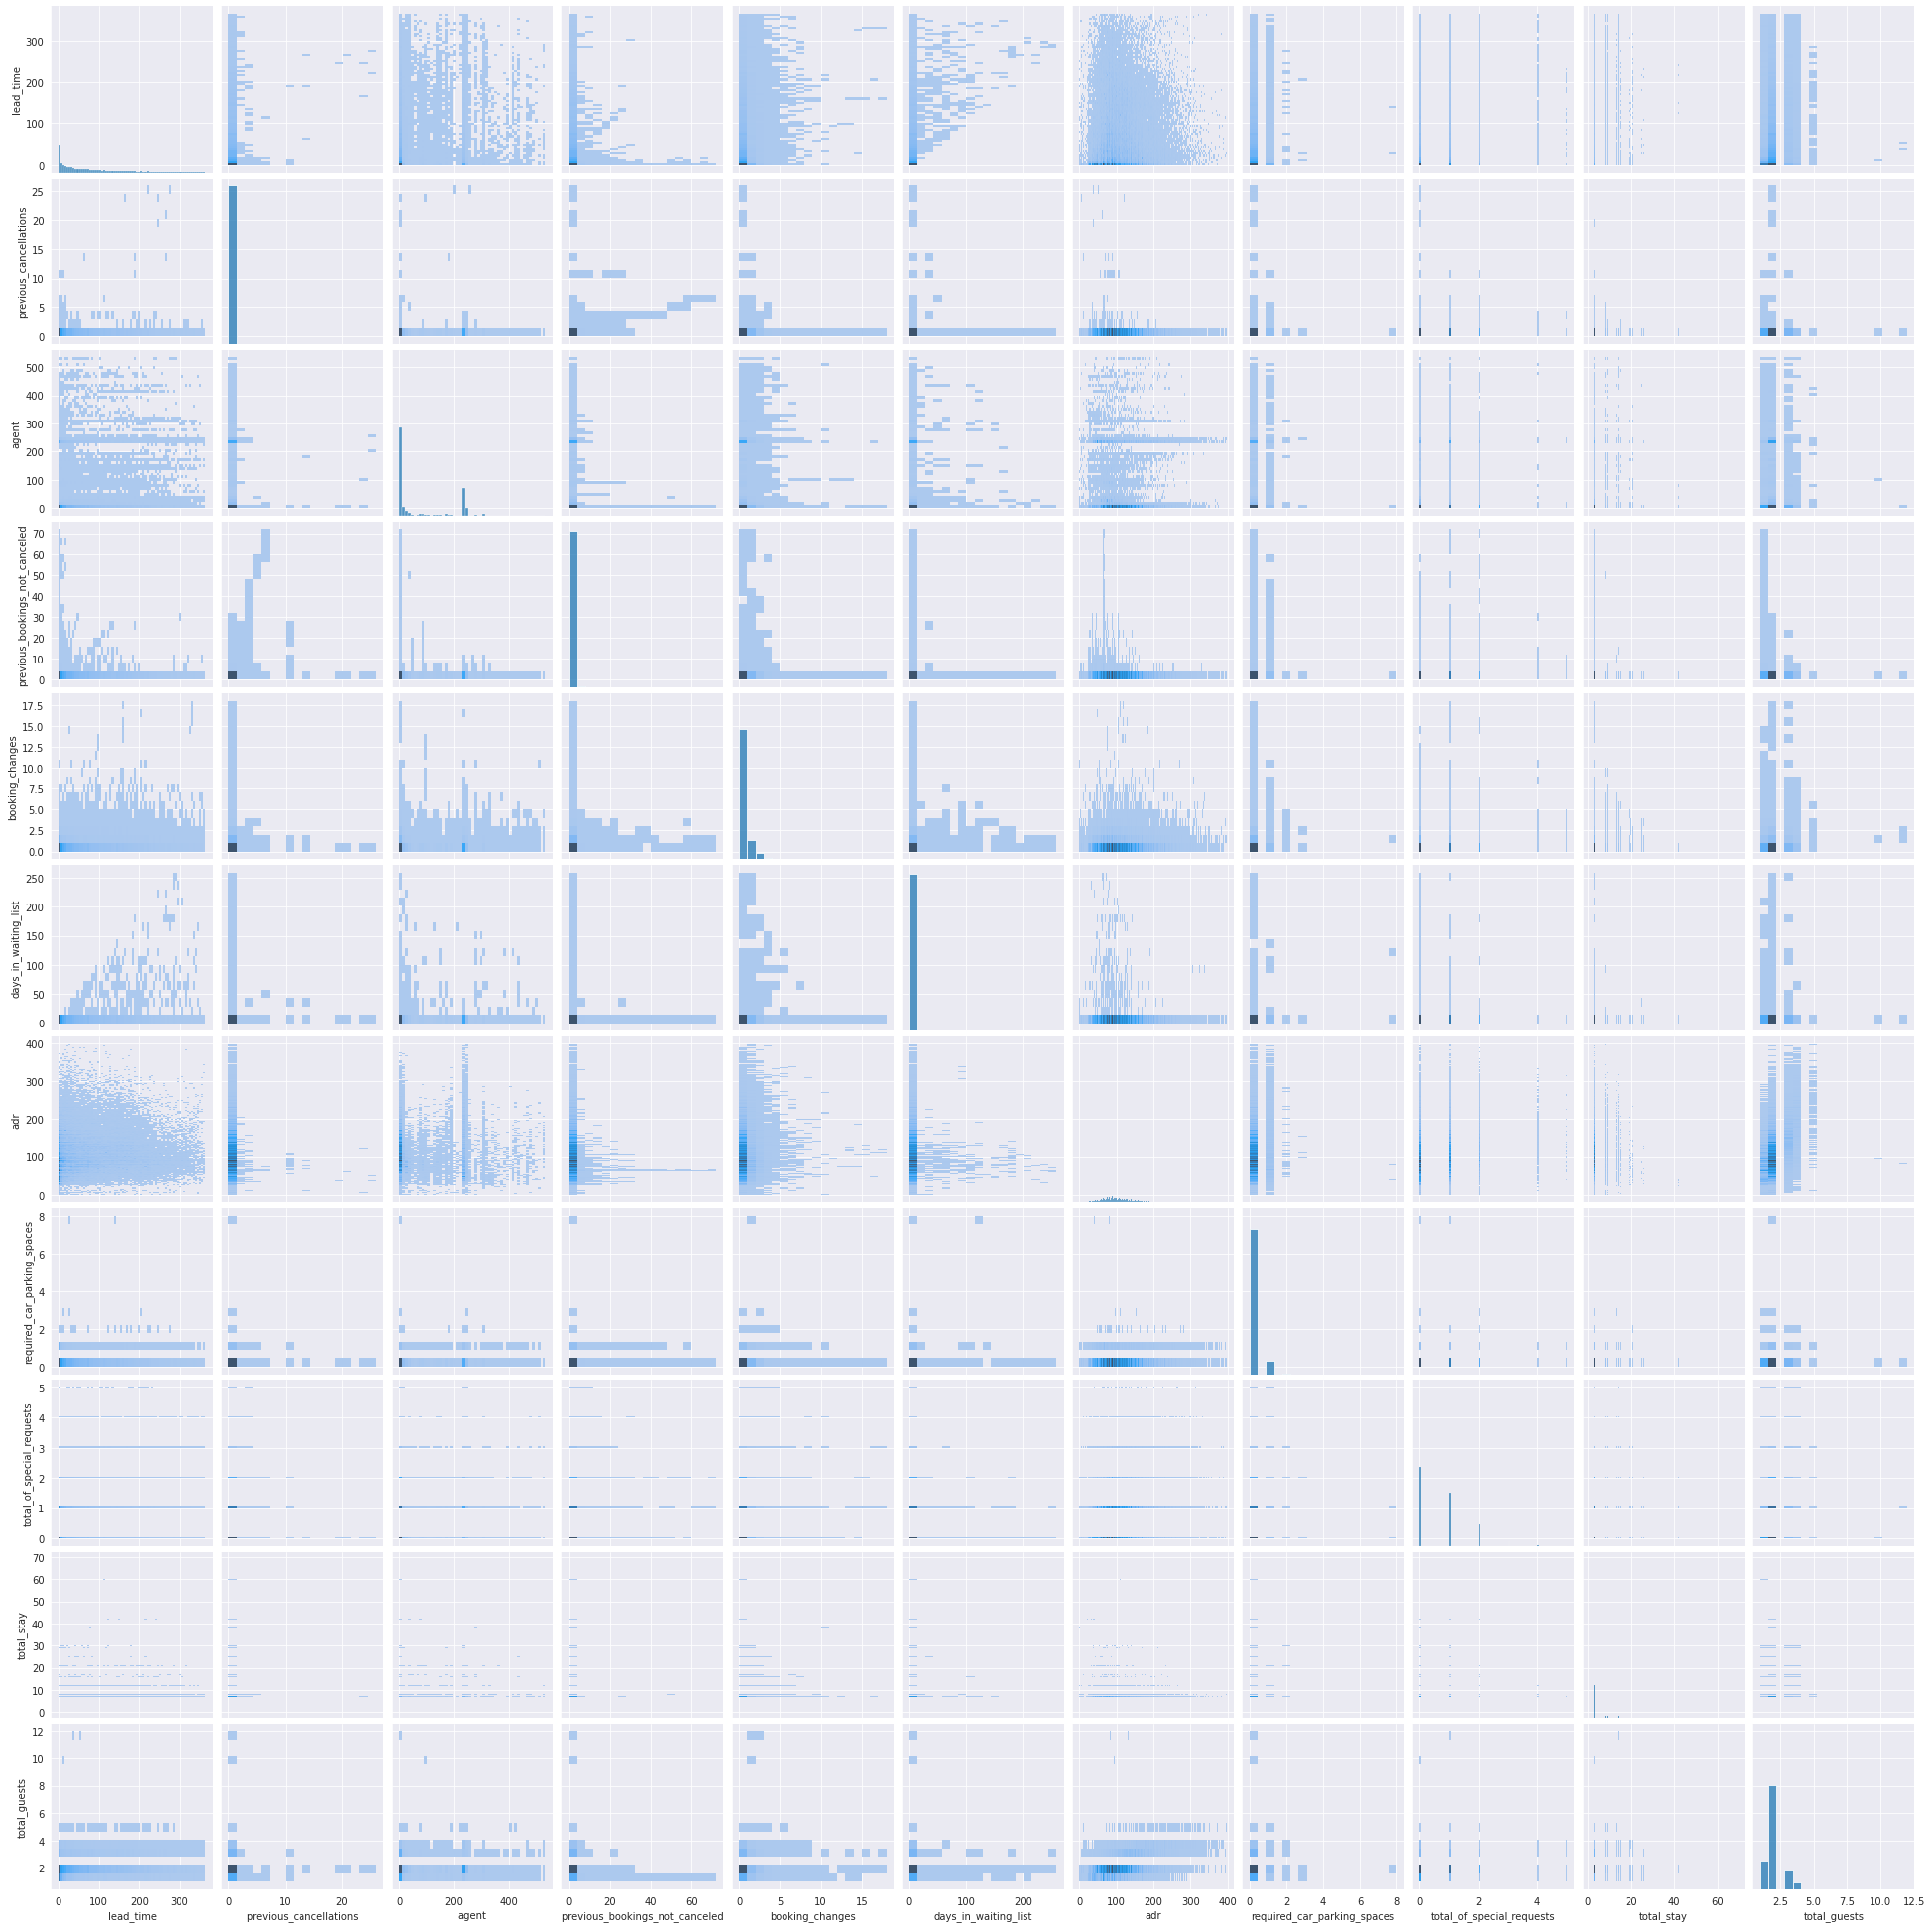

In [ ]:
# Pair Plot visualization code
sns.pairplot(num_df1,kind='hist')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***